In [3]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ## 영상 화소 접근방법
    - ### 255에서 각 화소값을 뺀 새로운 이미지 얻기

In [16]:
image = cv2.imread("./images/chap06/bright.jpg", cv2.IMREAD_GRAYSCALE)

- #### 1. array.item(), array.itemset() 메소드 이용

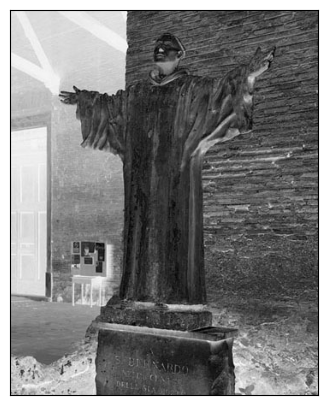

In [17]:
height, width = image.shape[:2]
new_image = image.copy()
for y in range(height):
    for x in range(width):
        pixel = new_image.item(y, x)
        new_image.itemset((y, x), 255-pixel)
show_images({"": new_image}, 5)

- #### 2. look-up-table 이용
    - ##### look-up-table = [255, 254, 253 ...]
    - ##### arr[n]의 값이 arr[255-n] 이라는 것을 이용하여 255에서 각 원소값을 뺀 매트릭스 얻기

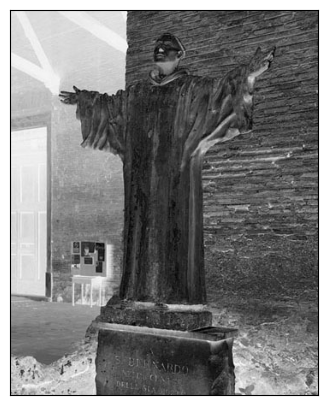

In [19]:
lut = np.array([255-i for i in range(256)], dtype="uint8")
new_image = lut[image]
show_images({"": new_image}, 5)

- #### 3. cv2.subtract() 이용

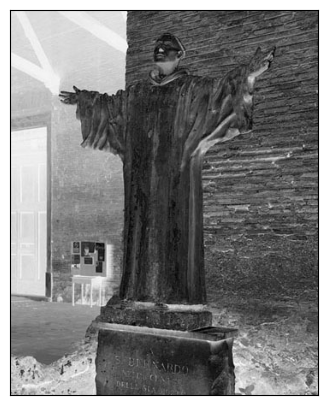

In [21]:
new_image = cv2.subtract(255, image)
show_images({"": new_image}, 5)

---

- ## 명암도 영상 생성
    - #### 1. 점진적으로 증가
    - #### 2. 계단현상 증가

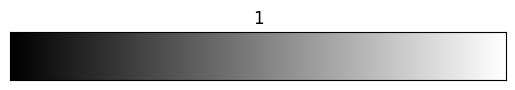

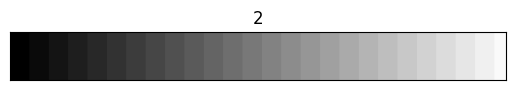

In [26]:
image1 = np.zeros((50, 512), dtype="uint8")
image2 = np.zeros((50, 512), dtype="uint8")

height, width = image1.shape
for y in range(height):
    for x in range(width):
        image1.itemset((y, x), x // 2)
        image2.itemset((y, x), x // 20 * 10)

show_rgb_image(image1, "1")
show_rgb_image(image2, "2")

---

- ## Saturation 방식, Modulo 방식
    - ### Saturation 방식: upper, lower bound가 존재 (0~255)
        - #### cv2.add(), cv2.subtract()
    - ### Modulo 방식: 픽셀 = 결과값 mod 256
        - #### 화소값 에러 발생

cv2.add()
[[255 249 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 234 251 ... 255 255 255]
 [254 240 255 ... 255 255 255]
 [247 249 255 ... 255 255 255]]

cv2.subtract()
[[ 70  49  72 ... 123 125 121]
 [ 67  55  69 ... 113 108  94]
 [ 62  72  84 ... 110 104  91]
 ...
 [ 62  34  51 ... 119 108 118]
 [ 54  40  58 ... 117 111 124]
 [ 47  49  61 ... 110 109 127]]

modulo +100
[[ 14 249  16 ...  67  69  65]
 [ 11 255  13 ...  57  52  38]
 [  6  16  28 ...  54  48  35]
 ...
 [  6 234 251 ...  63  52  62]
 [254 240   2 ...  61  55  68]
 [247 249   5 ...  54  53  71]]

modulo -100
[[ 70  49  72 ... 123 125 121]
 [ 67  55  69 ... 113 108  94]
 [ 62  72  84 ... 110 104  91]
 ...
 [ 62  34  51 ... 119 108 118]
 [ 54  40  58 ... 117 111 124]
 [ 47  49  61 ... 110 109 127]]



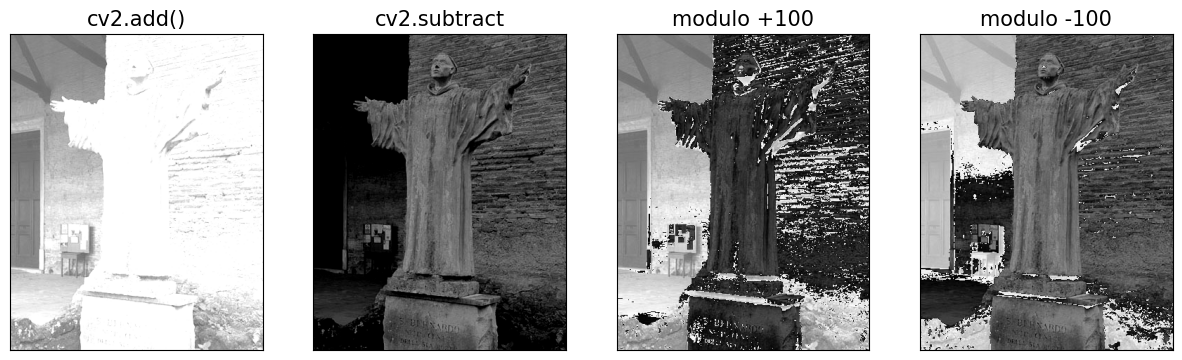

In [37]:
image = cv2.imread("./images/chap06/bright.jpg", cv2.IMREAD_GRAYSCALE)

dst1 = cv2.add(image, 100)
dst2 = cv2.subtract(image, 100)

dst3 = image + 100
dst4 = image - 100

print("cv2.add()")
print(dst1[100:150, 100:150])
print()

print("cv2.subtract()")
print(dst2[100:150, 100:150])
print()

print("modulo +100")
print(dst3[100:150, 100:150])
print()

print("modulo -100")
print(dst4[100:150, 100:150])
print()

show_images({"cv2.add()": dst1, "cv2.subtract": dst2, "modulo +100": dst3, "modulo -100": dst4}, 15)